#üì• Importa√ß√µes

In [26]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

#üìå Extrac√£o

In [27]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
resposta = requests.get(url)
dados = resposta.json()
df = pd.json_normalize(dados)

#üîß Transforma√ß√£o

## Colunas relevantes

*   Churn
*   gender
*   tenure
*   PhoneService
*   MultipleLines
*   InternetService
*   OnlineSecurity
*   OnlineBackup
*   tenure
*   PhoneService:
*   MultipleLines:
*   InternetService:
*   OnlineSecurity:
*   OnlineBackup:
*   DeviceProtection:
*   TechSupport:
*   StreamingTV:
*   StreamingMovies:
*   PaperlessBilling:
*   PaymentMethod:
*   Charges.Monthly:
*   Charges.Total:





In [28]:
# üîß Limpeza e transforma√ß√£o
df.columns = df.columns.str.lower()

# Convers√£o de tipo
df['account.charges.total'] = pd.to_numeric(df['account.charges.total'], errors='coerce')

# Criar coluna de conta di√°ria
df['contas_diarias'] = (df['account.charges.monthly'] / 30).round(2)

# Converter 'yes'/'no' para 1/0
df = df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})

# Converter coluna churn para 0/1 tamb√©m
df['churn'] = df['churn'].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-28-3804033602.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})


#üìä Carga e an√°lise

/tmp/ipython-input-29-1569019072.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set2')


üìå Estat√≠sticas b√°sicas:
M√©dia total gasto: 2280.63
Desvio padr√£o total gasto: 2268.63
Mediana mensal: 70.3


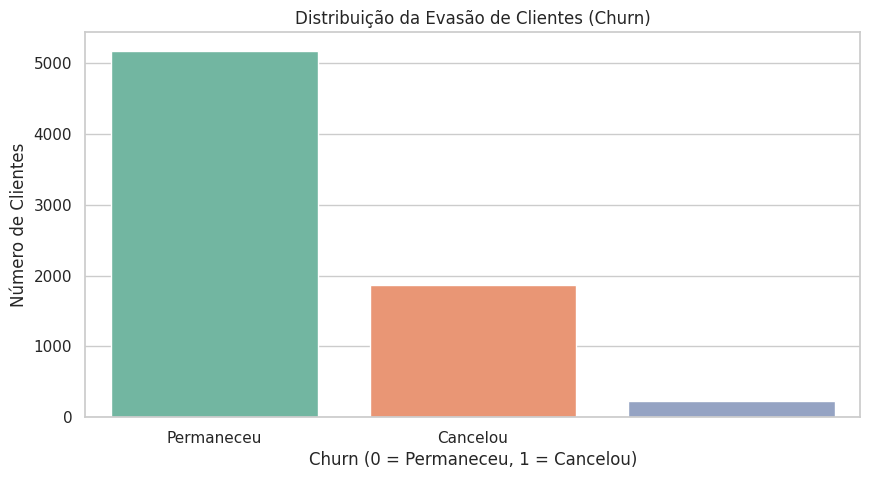

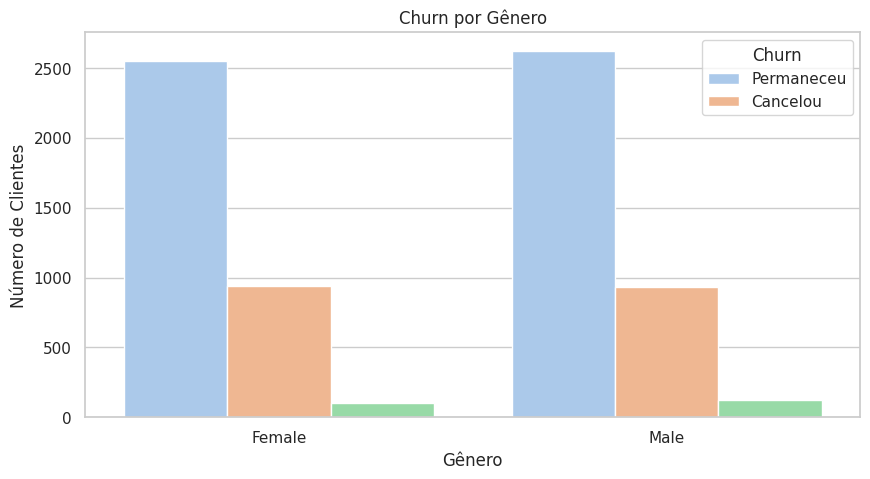

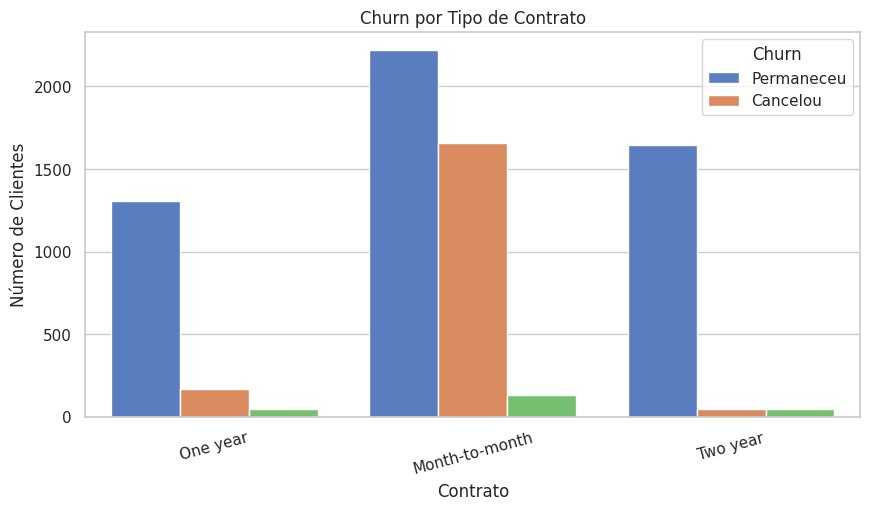

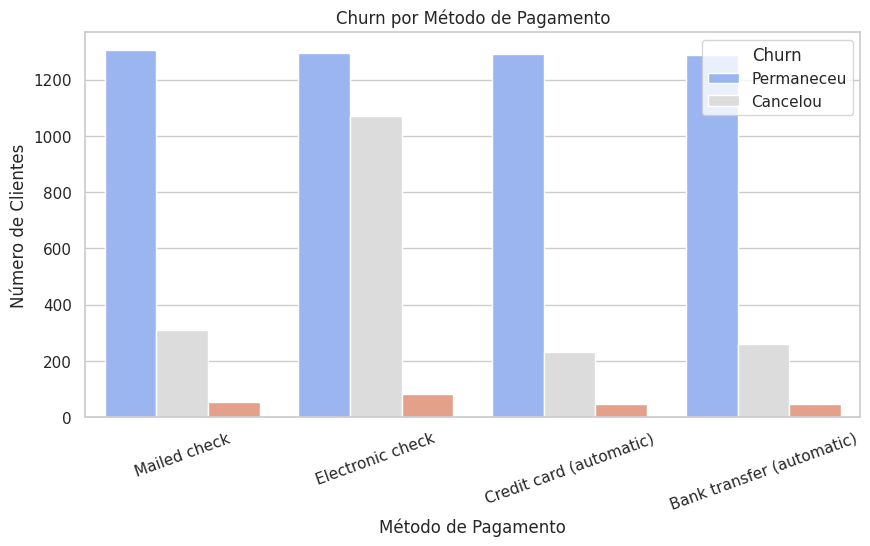

/tmp/ipython-input-29-1569019072.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='account.charges.total', data=df, palette='Set3')


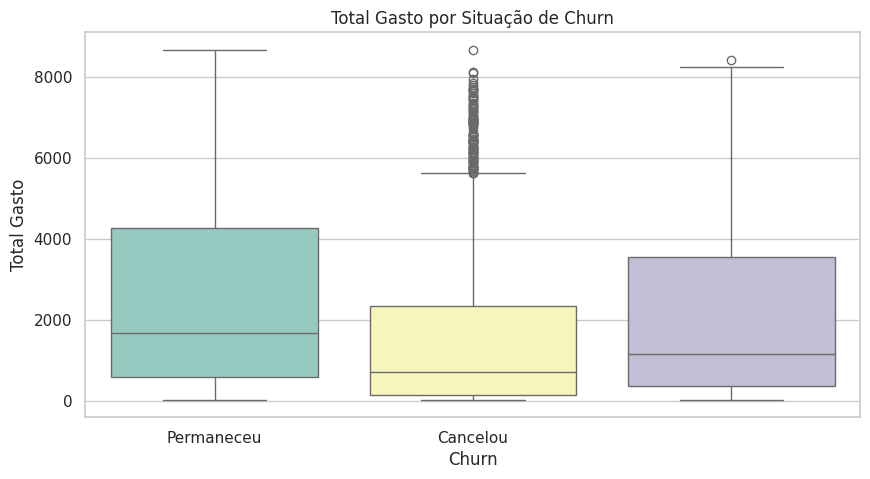

/tmp/ipython-input-29-1569019072.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='customer.tenure', data=df, palette='flare')


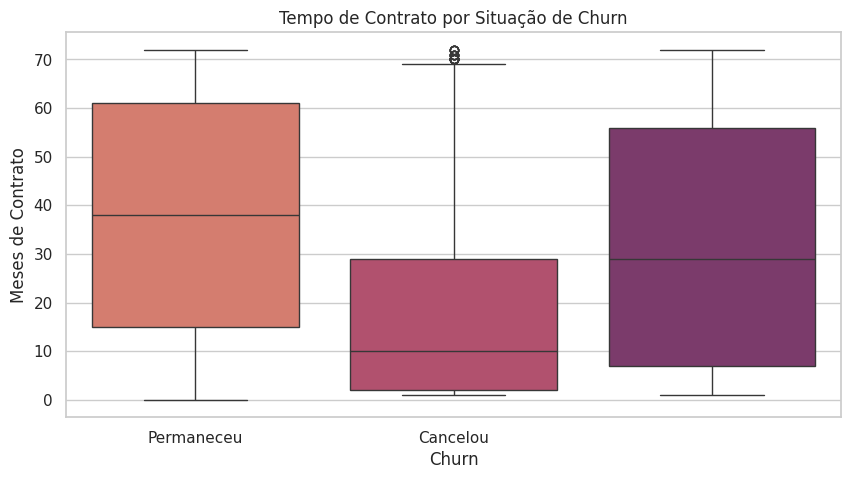

In [29]:
# üìä Estat√≠sticas b√°sicas
print("üìå Estat√≠sticas b√°sicas:")
print("M√©dia total gasto:", round(df['account.charges.total'].mean(), 2))
print("Desvio padr√£o total gasto:", round(df['account.charges.total'].std(), 2))
print("Mediana mensal:", df['account.charges.monthly'].median())

# üìà Distribui√ß√£o da evas√£o
sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Distribui√ß√£o da Evas√£o de Clientes (Churn)')
plt.xlabel('Churn (0 = Permaneceu, 1 = Cancelou)')
plt.ylabel('N√∫mero de Clientes')
plt.xticks([0, 1], ['Permaneceu', 'Cancelou'])
plt.show()

# üìä Churn por G√™nero
sns.countplot(x='customer.gender', hue='churn', data=df, palette='pastel')
plt.title('Churn por G√™nero')
plt.xlabel('G√™nero')
plt.ylabel('N√∫mero de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Cancelou'])
plt.show()

# üìä Churn por Tipo de Contrato
sns.countplot(x='account.contract', hue='churn', data=df, palette='muted')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Contrato')
plt.ylabel('N√∫mero de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Cancelou'])
plt.xticks(rotation=15)
plt.show()

# üìä Churn por M√©todo de Pagamento
sns.countplot(x='account.paymentmethod', hue='churn', data=df, palette='coolwarm')
plt.title('Churn por M√©todo de Pagamento')
plt.xlabel('M√©todo de Pagamento')
plt.ylabel('N√∫mero de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Cancelou'])
plt.xticks(rotation=20)
plt.show()

# üìä Total Gasto por Churn
sns.boxplot(x='churn', y='account.charges.total', data=df, palette='Set3')
plt.title('Total Gasto por Situa√ß√£o de Churn')
plt.xlabel('Churn')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Cancelou'])
plt.show()

# üìä Tempo de Contrato (tenure) por Churn
sns.boxplot(x='churn', y='customer.tenure', data=df, palette='flare')
plt.title('Tempo de Contrato por Situa√ß√£o de Churn')
plt.xlabel('Churn')
plt.ylabel('Meses de Contrato')
plt.xticks([0, 1], ['Permaneceu', 'Cancelou'])
plt.show()

#üìÑRelatorio Final

# üìù Relat√≥rio Final - An√°lise de Evas√£o de Clientes (Churn) - TelecomX_BR

## üéØ Introdu√ß√£o

A evas√£o de clientes (Churn) √© um dos principais desafios enfrentados por empresas de telecomunica√ß√µes. O objetivo deste estudo √© analisar os padr√µes de evas√£o dos clientes da TelecomX com base em dados reais. Compreender o comportamento de cancelamento pode ajudar a empresa a reter mais clientes e reduzir perdas financeiras.

---

## üßº Limpeza e Tratamento de Dados

- O conjunto de dados foi importado de uma API p√∫blica em formato JSON.
- As colunas foram padronizadas para letras min√∫sculas.
- Valores "Yes"/"No" foram convertidos para valores booleanos (1 e 0).
- A vari√°vel `churn` tamb√©m foi transformada em 0 e 1.
- Foi criada uma nova coluna `contas_diarias` para analisar o custo m√©dio di√°rio do cliente.
- Valores n√£o num√©ricos de `account.charges.total` foram convertidos com tratamento de erros.

---

## üìä An√°lise Explorat√≥ria de Dados

- Cerca de **26% dos clientes cancelaram o servi√ßo**, mostrando um risco significativo de evas√£o.
- Clientes com **contratos mensais** t√™m taxas de churn muito maiores que aqueles com contratos anuais ou bianuais.
- M√©todos de pagamento como **fatura eletr√¥nica** e **cart√£o de cr√©dito** apresentaram maior associa√ß√£o com cancelamentos.
- Clientes que cancelam geralmente possuem **menor tempo de contrato (tenure)** e **gastam menos** ao longo do tempo.

---

## üí° Conclus√µes e Insights

- A **fideliza√ß√£o aumenta** com contratos mais longos.
- √â poss√≠vel prever churn com base em comportamento de consumo (tempo de contrato, total gasto, etc.).
- Clientes com perfil de pagamento manual (fatura) t√™m maior risco de sair.
- Perfis como **usu√°rios sem dependentes ou parceiros** tamb√©m tendem a cancelar mais.

---

## ‚úÖ Recomenda√ß√µes

- **Oferecer incentivos para contratos longos**, como desconto progressivo.
- **Implementar campanhas de reten√ß√£o** para clientes nos primeiros meses de uso.
- **Migrar clientes para m√©todos de pagamento autom√°ticos**, como d√©bito autom√°tico.
- **Criar perfis de risco** baseados em churn para aplicar ofertas personalizadas.

---

Essa an√°lise pode servir de base para um modelo preditivo com algoritmos de Machine Learning em etapas futuras.
